In [1]:
import _09_utility as util

dataset = util.load_large_csv('spx_features.csv')
fssr = util.fn_all_subsets(True,0,True)
fssd = util.fnsubset_to_indexdictlist(dataset.columns,fssr)
fss = []
for d in fssd:
    fss.append(list(d.keys()))
print(fss)
dataset = dataset.values
arr_low = dataset[:,1]
arr_close = dataset[:,2]

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 103800164
loaded chunk 2 of size: 103800164
loaded chunk 3 of size: 103800164
loaded chunk 4 of size: 103800164
loaded chunk 5 of size: 103800164
loaded chunk 6 of size: 103800164
loaded chunk 7 of size: 103800164
loaded chunk 8 of size: 103800164
loaded chunk 9 of size: 103800164
loaded chunk 10 of size: 103800164
loaded chunk 11 of size: 103800164
loaded chunk 12 of size: 103800164
loaded chunk 13 of size: 103800164
loaded chunk 14 of size: 92415380
concat chunks
concatted chunks
Success.
Size of dataset:	1441815380
[[0, 1, 2], [3], [151, 152, 153], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

In [22]:
#example for initiation and evaluation steps

from importlib import reload
import _00_gene as _0
reload(_0)
import _01_initialization as _1
reload(_1)
import _02_evaluation as _2
reload(_2)
import _03_elitism as _3
reload(_3)
import _04_parentselection as _4
reload(_4)
import _05_reproduction as _5
reload(_5)
import _06_mutation as _6
import _09_utility as util


#dataset = util.load_large_csv('spx_features.csv')
#dataset, fss = util.drop_all_targets()

log_normalize = True
lag_allowance = 30
generations = 10
hold_for = 15

#kelsch_ratio
#average_return
#profit_factor

criteria = 'kelsch_ratio'

g1 = _0.Gene()

g1.custom(
	fss=fssd,
	acceptable_lag=lag_allowance,
	pattern_vals=[
		(412, 10, 'gt', 412, 14),
		(454, 8, 'gt', 464, 24)
	]
)

new_population = _5.evolutionary_branch(
	gene=g1,
	branch_size=0
)

print("collecting returns and kratio... ",end='')
arr_returns, arr_kratio = _1.collect_parallel_metrics(
	arr_close=arr_close,
	arr_low=arr_low,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)
print("complete.")

#begin generational loop
for generation in range(generations):

	population = new_population

	print(f"Generation {generation+1} ({criteria}): ",end='')

	returns, kelsch_ratio = _2.fitness(
		arr_close=arr_close,
		arr_low=arr_low,
		arr_returns=arr_returns,
		arr_kratio=arr_kratio,
		data=dataset,
		genes= population,
		hold_for=hold_for,
		lag_allow=lag_allowance,
		specific_data=None,#'form_519',
		log_normalize=log_normalize
	)
	unsorted_population = _2.associate(
		genes=population,
		returns=returns,
		kelsch_ratio=kelsch_ratio,
		log_normalize=log_normalize
	)

	'''unsorted_population = _2.filter_population(
		population=unsorted_population,
		avg_return=2.00 / 25000,
		tot_return=0.25,
		profit_factor=0,
		kelsch_ratio=2.0,
		entry_frequency=0.00
	)'''

	population = _2.sort_population(
		population=unsorted_population,
		criteria=criteria
	)

	avg, top = _2.simple_generational_stat_output(population,criteria)
	print(f"AVG {avg}, BEST {top}, FROM {len(population)} GENES.")

	elites = _3.collect_elite(
		sorted_population=population,
		filter_criteria=1
	)
	parents = _4.collect_parents(
		sorted_population=population,
		criteria=criteria,
		num_parents=15
	)
	family = _5.reproduce(
		parents=parents,
		mode='exponential'
	)
	shuffled_family = _1.shuffle_population(
		population=family
	)
	mutated_family = _6.mutation_round(
		shuffled_population=shuffled_family,
		partial_mutation_prob=0.000,
		pattern_mutation_prob=0.000,
		feat_idx_pool=fss	
	)
	new_population = _1.combine_populations(
		populations=[elites, mutated_family]
	)

collecting returns and kratio... complete.
325000tion 1 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 1 GENES.
325000tion 2 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 3 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 4 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 5 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 6 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 7 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 8 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 9 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.
325000tion 10 (kelsch_ratio): AVG 6.569039182125424, BEST 6.569039182125424, FROM 2 GENES.


In [ ]:
from importlib import reload
import _01_initialization as _1
import _02_evaluation as _2
reload(_10)
import _10_era as _10

log_normalize = True
lag_allowance = 30
generations = 5
hold_for = 15
criteria = 'mkr'
elite_criteria = 1
num_parents = 10
rep_mode = 'exponential'
part_mproba = 0.000
ptrn_mproba = 0.000

arr_returns, arr_kratio = _1.collect_parallel_metrics(
	arr_close=arr_close,
	arr_low=arr_low,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)

load_genes = _0.load_custom_genes(
	fss=fss,
	lag_allowance=lag_allowance,
	gene_pattern_sets=[
		[
		(412, 10, 'gt', 412, 14),
		(454, 8, 'gt', 464, 24)
	],
		[

	],
		[

	],
		[

	],
]
)

g1.custom(
	fss=fssd,
	acceptable_lag=lag_allowance,
	pattern_vals=[
		(412, 10, 'gt', 412, 14),
		(454, 8, 'gt', 464, 24)
	]
)

num_eras = 10
era_elites = []

for era in range(num_eras):
	new_population = _5.evolutionary_branch(
	gene=g1,
	branch_size=100
	)

	endera = _10.era(
		era_num		=	era,
		new_population	=	new_population,
		generations	=	generations,
		dataset		=	dataset,
		fss			=	fss,
		criteria	=	criteria,
		log_normalize	=	log_normalize,
		hold_for	=	hold_for,
		lag_allowance	=	lag_allowance,
		arr_close	=	arr_close,
		arr_low		=	arr_low,
		arr_returns	=	arr_returns,
		arr_kratio	=	arr_kratio,
		elite_criteria = 1,
		num_parents = 4,
		rep_mode = 'exponential',
		part_mproba = 0.000,
		ptrn_mproba = 0.000,
		use_strict_filter	=	True,
		strict_filter_kwargs	=	{
			'avg_return':(0.60 / 25000),
			'tot_return':0.25,
			'profit_factor':0.5,
			'kelsch_ratio':2.0,
			'entry_frequency':0.01
		}
	)

	endera = _2.sort_population(endera,criteria)
	era_elites.append(endera[0])


347258
347258


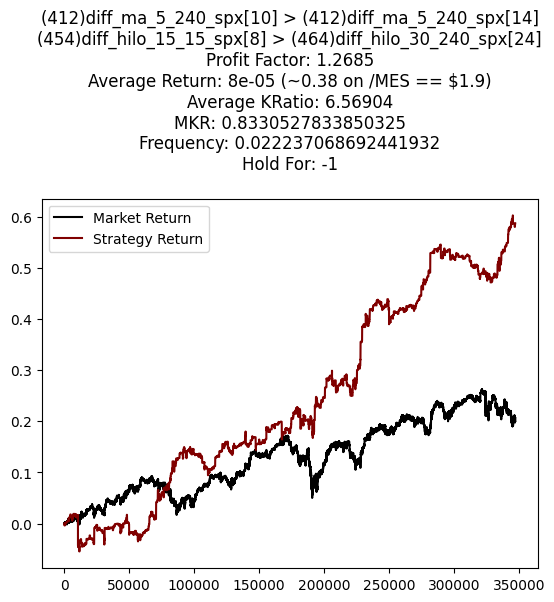

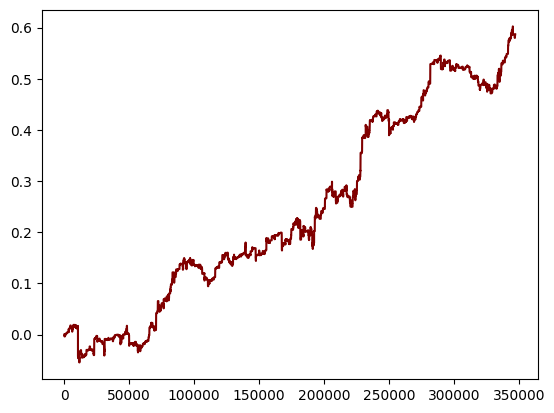

In [24]:
reload(_2)
_2.show_returns(population[0]._array_returns, arr_close=arr_close, gene_kwargs={"population":population,"criteria":criteria,"fss":fssd})

325000347258
347258


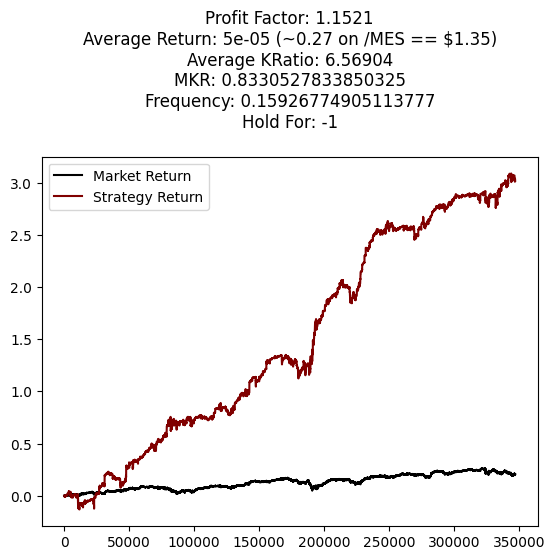

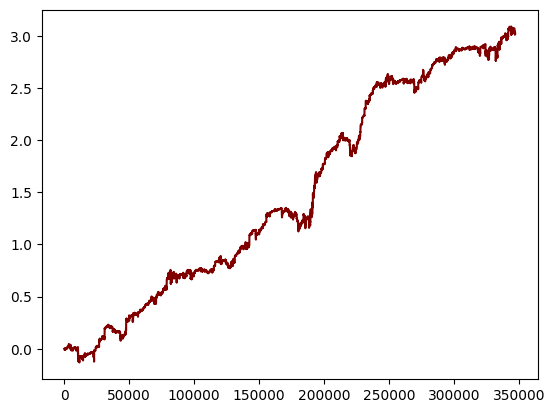

In [10]:
from importlib import reload
import _00_gene as _0
import _01_initialization as _1
import _02_evaluation as _2
reload(_0)
reload(_2)

log_normalize = True
lag_allowance = 30
generations = 5
hold_for = 15
criteria = 'mkr'
elite_criteria = 1
num_parents = 10
rep_mode = 'exponential'
part_mproba = 0.000
ptrn_mproba = 0.000

arr_returns, arr_kratio = _1.collect_parallel_metrics(
	arr_close=arr_close,
	arr_low=arr_low,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)


load_genes = _0.load_custom_genes(
	fss=fssd,
	lag_allowance=lag_allowance,
	gene_pattern_sets=[
	[#gene 0
		(412, 10, 'gt', 412, 14),
		(454, 8, 'gt', 464, 24)
	],[#gene 6
		(423, 22, 'lt', 423, 14),
        (428, 5, 'lt', 428, 20)
	],[#gene 7
		(212, 10, 'lt', 207, 18),
        (77, 13, 'lt', 68, 4)
	],[#gene 8
		(440, 27, 'gt', 437, 0),
        (423, 12, 'lt', 423, 6)
	],
]
)


new = _2.show_combined_performance(
    population=load_genes,
    arr_close=arr_close,
    arr_low=arr_low,
    arr_kratio=arr_kratio,
    arr_returns=arr_returns,
    data=dataset,
    hold_for=hold_for,
    lag_allow=lag_allowance,
    specific_data=None,
    log_normalize=log_normalize,
    criteria=criteria,
    fss=fssd
)


In [12]:
print(new.r2)

0.9763586593097323
